In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.5.1+cu124


In [3]:
weight = 0.7
bias=0.3
start=0
end=1
step=0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

print(f"X: {X[:5]}\n")
print(f"y: {y[:5]}")

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


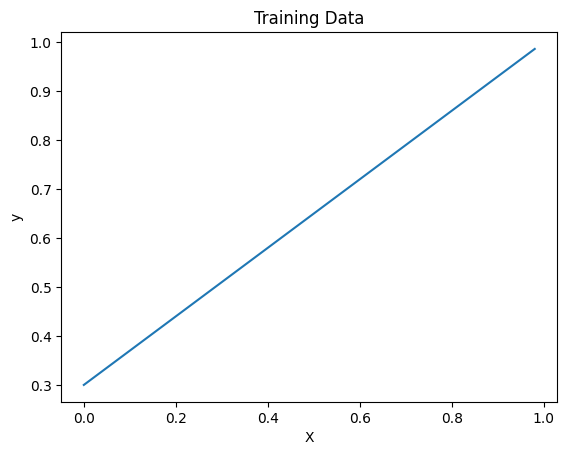

In [4]:
plt.plot(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.show()


In [5]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1,out_features=1)
  def forward(self,x):
    return self.linear(x)

In [6]:
torch.manual_seed(42)
model = LinearRegressionModel()
print(model.state_dict())


OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])


In [7]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [8]:
epochs = 100
for epoch in range(epochs):
  y_pred = model(X)
  loss = loss_fn(y_pred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.5616317987442017
Epoch: 10 | Loss: 0.43762198090553284
Epoch: 20 | Loss: 0.313612163066864
Epoch: 30 | Loss: 0.18960237503051758
Epoch: 40 | Loss: 0.06559258699417114
Epoch: 50 | Loss: 0.035850170999765396
Epoch: 60 | Loss: 0.03058842569589615
Epoch: 70 | Loss: 0.025638693943619728
Epoch: 80 | Loss: 0.020707078278064728
Epoch: 90 | Loss: 0.01577720046043396


<Figure size 1000x600 with 0 Axes>

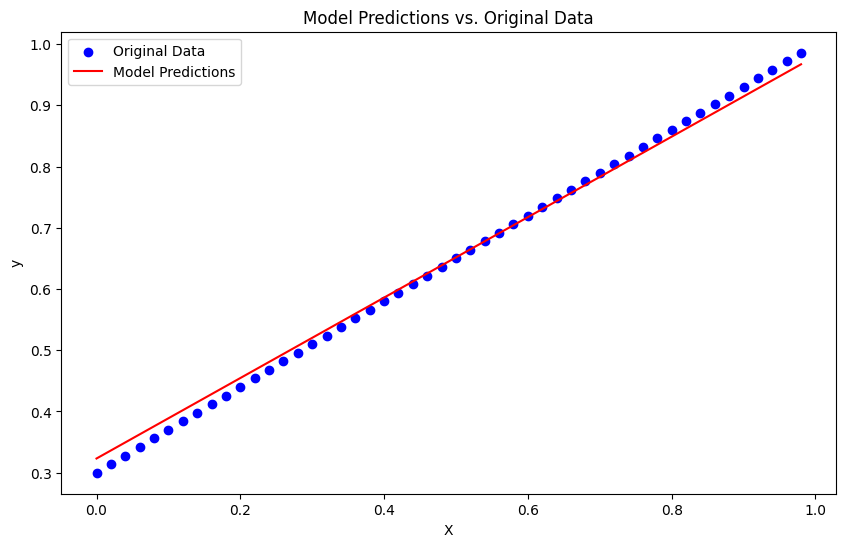

In [9]:
with torch.inference_mode():
  y_pred = model(X)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Original Data", color='blue')
plt.plot(X, y_pred, label="Model Predictions", color='red')
plt.legend()
plt.title("Model Predictions vs. Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
MODEL_PATH = "linear_regression_model.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f'Model saveda at {MODEL_PATH}')

Model saveda at linear_regression_model.pth


In [11]:
from google.colab import files
files.download(MODEL_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>